# IBS 574 Python Homework 3

#### Add your name and the date your notebook was last updated

In [1]:
%load_ext watermark
%watermark -a "Thea Ornstein" -d 

Thea Ornstein 2020-02-18


#### Load libraries

In [2]:
import watermark
import pandas as pd
import numpy as np
from sinfo import sinfo
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random 
import matplotlib.pyplot as plt


#### Load data
note: include test for this chunk from previous homework

In [3]:
countdata = "https://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv"
counts = pd.read_csv(countdata, index_col = 0, sep = "\t")
len(counts) == 14944

True

#### Prepare data for PCA Analysis

In [4]:
counts_transpose = counts.T
len(counts_transpose) == 14

group = ["Control", "Control", "Control", "Control", "Control", "Control", "Control",
        "Case", "Case", "Case", "Case", "Case","Case", "Case",]

counts_transpose["group"] = group

#### Determine Principal Components
note: include test for this chunk from previous homework

In [5]:
features = pd.Series(counts_transpose.columns)[0:14944]

feature_arr = counts_transpose.loc[:, features].values

target_arr = counts_transpose.loc[:, ["group"]].values

fitted_features = StandardScaler().fit_transform(feature_arr)

In [6]:
random.seed(888)

pca = PCA(n_components = 2, random_state = 888)

principalComponents = pca.fit_transform(fitted_features)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

principalDataframe.index = counts_transpose.index

targetDataframe = counts_transpose[["group"]]

newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1)

principalDataframe["PC1"].max() == 126.57815113747459

False

#### Graph the principal components by sample group

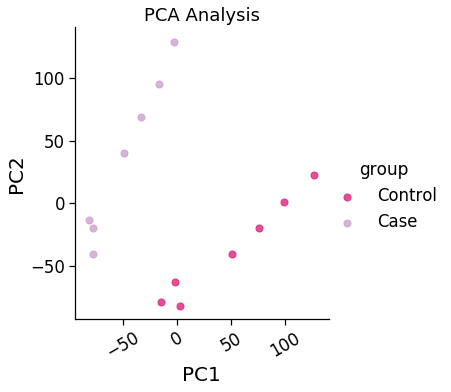

In [7]:

sns.set_context("notebook", font_scale=1.5, rc={"font.size":8,"axes.labelsize":20})

     
a=sns.lmplot( x="PC1", y="PC2",
           data=newDataframe,
           fit_reg=False,
           hue='group',
           palette="PuRd_r",
           legend_out=True, 
                scatter_kws={"s":50}) 

plt.title("PCA Analysis")

a.set_xticklabels(rotation=30)





#### Interpret the graph for your principal investigator using explained variance

In [8]:
pca.explained_variance_ratio_

array([0.39218002, 0.36808828])

Approximately 39.2% of the variability between these sample groups is explained by a sample being either a case or a control. 
Approximately 36.88% can be attributed to another variable unaccounted for in the experimental design.

#### Report Session Information


In [9]:
sinfo()

-----
matplotlib  3.1.3
numpy       1.18.1
pandas      0.25.3
seaborn     0.10.0
sinfo       0.3.1
sklearn     0.22.1
watermark   2.0.2
-----
IPython             7.11.1
jupyter_client      5.3.4
jupyter_core        4.6.1
notebook            6.0.3
-----
Python 3.8.1 (default, Jan  8 2020, 16:15:59) [Clang 4.0.1 (tags/RELEASE_401/final)]
macOS-10.15.3-x86_64-i386-64bit
4 logical CPU cores, i386
-----
Session information updated at 2020-02-18 08:42
